In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
#define the convnet 
def build(input_shape, classes):
    model = models.Sequential() 
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25)) 

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [6]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
X_train.shape

(50000, 32, 32, 3)

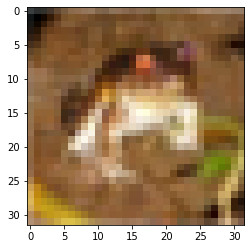

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
model=build((32, 32, 3), 10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])
 
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2) 

Epoch 1/5
313/313 [==============================] - 67s 215ms/step - loss: 1.6924 - accuracy: 0.4018 - val_loss: 1.5172 - val_accuracy: 0.4824
Epoch 2/5
313/313 [==============================] - 60s 193ms/step - loss: 1.3626 - accuracy: 0.5211 - val_loss: 1.3635 - val_accuracy: 0.5187
Epoch 3/5
313/313 [==============================] - 66s 211ms/step - loss: 1.2365 - accuracy: 0.5657 - val_loss: 1.1387 - val_accuracy: 0.6053
Epoch 4/5
313/313 [==============================] - 57s 184ms/step - loss: 1.1411 - accuracy: 0.6007 - val_loss: 1.1030 - val_accuracy: 0.6148
Epoch 5/5
313/313 [==============================] - 48s 154ms/step - loss: 1.0674 - accuracy: 0.6242 - val_loss: 1.1513 - val_accuracy: 0.6035


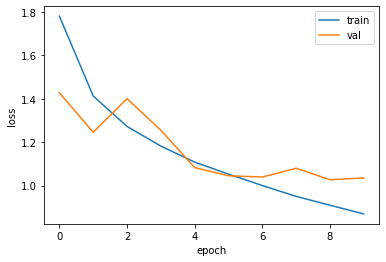

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [7]:
score = model.evaluate(X_test, y_test)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 1.0291 - accuracy: 0.6477

Test score: 1.0290974378585815
Test accuracy: 0.6477000117301941


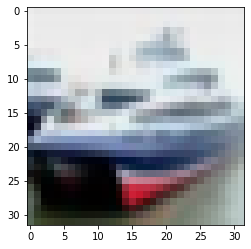

In [10]:
plt.imshow(X_test[1])
plt.show()

In [11]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
model.predict(X_test[1:2])

array([[0.008878199 , 0.32958594  , 0.0000011389, 0.0000003645,
        0.0000002584, 0.0000000473, 0.0000000124, 0.0000000197,
        0.65553856  , 0.005995468 ]], dtype=float32)